In [ ]:
pip install umap-learn

In [ ]:
pip install datashader

In [ ]:
!pip install numba

In [ ]:
!pip install bokeh

In [ ]:
!pip install "holoviews[recommended]"

In [ ]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [ ]:
import seaborn as sns
from os.path import join as pjoin
from matplotlib.backends.backend_pdf import PdfPages
#from cuml import UMAP
from matplotlib.lines import Line2D

In [ ]:
from umap import UMAP
import umap
import umap.plot

In [ ]:
#Paso 1: Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Paso 2: Localizar el archivo TSV
file_path = '/content/drive/MyDrive/camda2024/data/Amr_Count.tsv'

# Paso 3: Leer el archivo TSV usando pandas
import pandas as pd

df = pd.read_csv(file_path, sep='\t')
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-11-e1e449c1cb60>:11: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep='\t')


,accession,genus,species,phenotype,antibiotic,measurement_value,3000620,3003665,3000535,3000833,...,3000979,3006372,3002088,3001184,3001041,3000890,3002455,3001194,3001651,3001394
0,GCA_002947415,Acinetobacter,baumannii,Resistant,meropenem,8.0,33.0,19.0,20.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,GCA_002947845,Acinetobacter,baumannii,Resistant,meropenem,8.0,35.0,18.0,18.0,18.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,GCA_002948925,Acinetobacter,baumannii,Resistant,meropenem,8.0,33.0,18.0,19.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,GCA_002996805,Acinetobacter,baumannii,Resistant,meropenem,8.0,35.0,18.0,18.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,GCA_003006035,Acinetobacter,baumannii,Resistant,meropenem,8.0,38.0,21.0,20.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7576,SRR3242343,Salmonella,enterica,NaN,ciprofloxacin,NaN,19.0,19.0,32.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7577,SRR2082856,Salmonella,enterica,NaN,ciprofloxacin,NaN,20.0,25.0,30.0,28.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7578,SRR3242362,Salmonella,enterica,NaN,ciprofloxacin,NaN,20.0,28.0,28.0,31.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7579,SRR1257300,Salmonella,enterica,NaN,ciprofloxacin,NaN,24.0,28.0,27.0,28.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import copy
import polars as pl
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import TruncatedSVD, NMF
import pickle

def get_tfidf(data):
    vectorizer = TfidfTransformer()
    X = vectorizer.fit_transform(data)
    tfidf = X.toarray()

    return tfidf

In [ ]:
# Crear la nueva columna combinada con las primeras letras
df['code'] = df['genus'].str[:2] + df['species'].str[0] + df['phenotype'].str[0] + df['antibiotic'].str[0]

df_code = df.iloc[:, list(range(6)) + [-1] + list(range(6, len(df.columns) - 1))]

df_code


,accession,genus,species,phenotype,antibiotic,measurement_value,code,3000620,3003665,3000535,...,3000979,3006372,3002088,3001184,3001041,3000890,3002455,3001194,3001651,3001394
0,GCA_002947415,Acinetobacter,baumannii,Resistant,meropenem,8.0,AcbRm,33.0,19.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,GCA_002947845,Acinetobacter,baumannii,Resistant,meropenem,8.0,AcbRm,35.0,18.0,18.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,GCA_002948925,Acinetobacter,baumannii,Resistant,meropenem,8.0,AcbRm,33.0,18.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,GCA_002996805,Acinetobacter,baumannii,Resistant,meropenem,8.0,AcbRm,35.0,18.0,18.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,GCA_003006035,Acinetobacter,baumannii,Resistant,meropenem,8.0,AcbRm,38.0,21.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7576,SRR3242343,Salmonella,enterica,NaN,ciprofloxacin,NaN,NaN,19.0,19.0,32.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7577,SRR2082856,Salmonella,enterica,NaN,ciprofloxacin,NaN,NaN,20.0,25.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7578,SRR3242362,Salmonella,enterica,NaN,ciprofloxacin,NaN,NaN,20.0,28.0,28.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7579,SRR1257300,Salmonella,enterica,NaN,ciprofloxacin,NaN,NaN,24.0,28.0,27.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_code['code'].unique()

array(['AcbRm', 'AcbSm', 'CajSc', 'CajRc', 'EncSm', 'EncRm', 'EscRm',
       'EscSm', 'KlpRm', 'KlpSm', 'NegSc', 'NegRc', 'PsaSm', 'PsaRm',
       'SaeRc', 'SaeSc', nan], dtype=object)

In [ ]:
# Filtra el DataFrame por la columna 'phenotype'
df_training = df_code[df_code['phenotype'].isin(['Susceptible', 'Resistant'])]
df_test = df_code[df_code['phenotype'].isna()]

# Filtra el DataFrame original para seleccionar solo las columnas deseadas
df_filtrado = df_training.iloc[:,7:]
df_filtrado_test = df_test.iloc[:,7:]

labels = df_training['code']
label_encoder = LabelEncoder()

# Fit and transform the labels
encoded_labels = label_encoder.fit_transform(labels)

# Dividir los datos codificados en conjunto de entrenamiento y conjunto de prueba
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(df_filtrado, encoded_labels, stratify=encoded_labels, test_size=test_size, random_state=42)


# Directorio de salida para guardar los resultados y predicciones
output_folder = "/content/output_code2"
os.makedirs(output_folder, exist_ok=True)

trans = umap.UMAP(n_neighbors=10, n_components=3, min_dist=0.5, metric='cosine', random_state=42).fit(X_train)

algorithms = {
    "Random Forest (1200 trees)": RandomForestClassifier(n_estimators=1200, random_state=42),
    "Random Forest (500 trees)": RandomForestClassifier(n_estimators=500, random_state=42),
    "KNN (k=1)": KNeighborsClassifier(n_neighbors=1),
    "KNN (k=3)": KNeighborsClassifier(n_neighbors=3),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5),
    "SVM (RBF Kernel)": SVC(kernel='rbf', gamma='auto', C=1, random_state=42),
}
results = {}
test_embedding = trans.transform(X_test)

for algo_name, algo in algorithms.items():
    # Train the model
    algo.fit(trans.embedding_, y_train)

    # Make predictions on the test set
    #y_pred = algo.predict(X_test)

    y_pred = algo.predict(test_embedding)
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    #precision = precision_score(y_test, y_pred)
    #recall = recall_score(y_test, y_pred)
    #roc_auc = roc_auc_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # Store results
    results[algo_name] = {'accuracy': accuracy, 'f1_score': f1,  'confusion_matrix': cm}

    # Plot and save confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - {algo_name}')
    plt.savefig(os.path.join(output_folder, algo_name + "_confusion_matrix.png"))
    plt.close()

    # Realiza predicciones en df_test
    tests_embedding = trans.transform(df_filtrado_test)
    test_predictions = algo.predict(tests_embedding)

    # Guarda las predicciones en un archivo CSV
    test_predictions_labels = label_encoder.inverse_transform(test_predictions)
    test_predictions_df = pd.DataFrame({
        'genus': df_test.genus,
        'species': df_test.species,
        'accession': df_test.accession,
        'antibiotic': df_test.antibiotic,
        'status': test_predictions_labels
    })
    test_predictions_df.to_csv(os.path.join(output_folder, algo_name + "_test_predictions.csv"), index=False)

# Guarda los resultados generales en un CSV
results_df_test = pd.DataFrame.from_dict(results, orient='index')
results_df_test.to_csv(os.path.join(output_folder, "overall_results.csv"))

# Save overall results to CSV
#results_df_test = pd.DataFrame.from_dict(results, orient='index')
results_df_test

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


,accuracy,f1_score,confusion_matrix
Random Forest (1200 trees),0.863833,0.860960,"[[15, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
Random Forest (500 trees),0.862099,0.859402,"[[15, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
KNN (k=1),0.849957,0.849707,"[[14, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
KNN (k=3),0.860364,0.858818,"[[14, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
KNN (k=5),0.873374,0.870647,"[[14, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
SVM (RBF Kernel),0.871639,0.859937,"[[12, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."


# Para hacer el plot

In [ ]:
# Rellenar valores NaN en la columna 'phenotype'
df_code['code'] = df_code['code'].fillna('Target')
df_code.tail()

,accession,genus,species,phenotype,antibiotic,measurement_value,code,3000620,3003665,3000535,...,3000979,3006372,3002088,3001184,3001041,3000890,3002455,3001194,3001651,3001394
7576,SRR3242343,Salmonella,enterica,NaN,ciprofloxacin,NaN,Target,19.0,19.0,32.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7577,SRR2082856,Salmonella,enterica,NaN,ciprofloxacin,NaN,Target,20.0,25.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7578,SRR3242362,Salmonella,enterica,NaN,ciprofloxacin,NaN,Target,20.0,28.0,28.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7579,SRR1257300,Salmonella,enterica,NaN,ciprofloxacin,NaN,Target,24.0,28.0,27.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7580,SRR4280580,Salmonella,enterica,NaN,ciprofloxacin,NaN,Target,21.0,27.0,28.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Filtra el DataFrame por la columna 'phenotype'
df_training = df_code[df_code['phenotype'].isin(['Susceptible', 'Resistant'])]
df_test = df_code[df_code['phenotype'].isin(['Target'])]

labels = df_training['code']
label_encoder = LabelEncoder()

# Fit and transform the labels
encoded_labels = label_encoder.fit_transform(labels)

<Axes: >

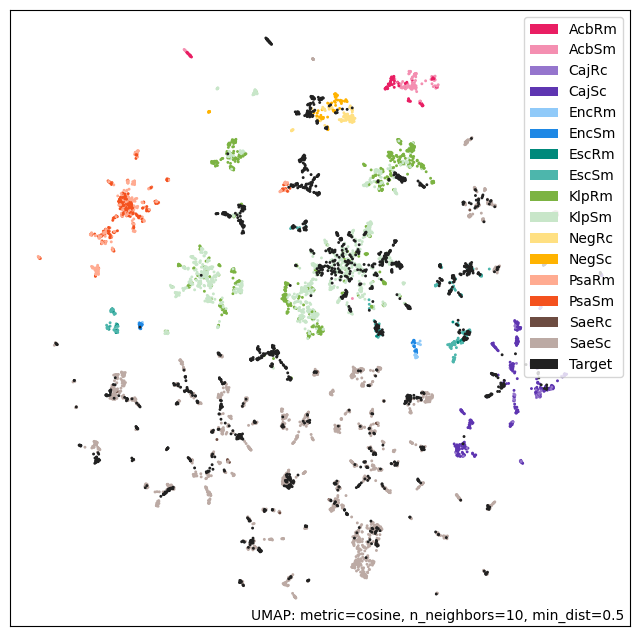

In [ ]:
reducer = umap.UMAP(n_neighbors=10, n_components=2, min_dist=0.5, metric='cosine', random_state=42).fit(df_code_num)
umap.plot.points(reducer, labels=df_code.code, color_key = {'AcbRm':"#E91E63", 'AcbSm':"#F48FB1", 'CajSc': "#5E35B1", 'CajRc':"#9575CD", 'EncSm':"#1E88E5", 'EncRm':"#90CAF9", 'EscRm':"#00897B",
       'EscSm':"#4DB6AC", 'KlpRm':"#7CB342", 'KlpSm':"#C8E6C9", 'NegSc':"#FFB300", 'NegRc':"#FFE082", 'PsaSm':"#F4511E", 'PsaRm':"#FFAB91",
       'SaeRc':"#6D4C41", 'SaeSc':"#BCAAA4", "Target":"#212121"}
)

# Solo con etiqueta de phenotype

Tarda demasiado porque es con una lista de muchos parámetros a probar

In [ ]:
# Directorio de salida para guardar los resultados y predicciones
output_folder = "/content/output_all"
os.makedirs(output_folder, exist_ok=True)

# Listas de parámetros para UMAP
n_neighbors_list = [5, 10, 20, 25, 50]
min_dists_list = [0.1, 0.2, 0.5, 0.8]

algorithms = {
    "Random Forest (1200 trees)": RandomForestClassifier(n_estimators=1200, random_state=42),
    "Random Forest (500 trees)": RandomForestClassifier(n_estimators=500, random_state=42),
    "KNN (k=1)": KNeighborsClassifier(n_neighbors=1),
    "KNN (k=3)": KNeighborsClassifier(n_neighbors=3),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5),
    "SVM (RBF Kernel)": SVC(kernel='rbf', gamma='auto', C=1, random_state=42),
}

results = {}

for n_neighbors in n_neighbors_list:
    for min_dist in min_dists_list:
        # Crear y ajustar el modelo UMAP
        trans = umap.UMAP(n_neighbors=n_neighbors, n_components=3, min_dist=min_dist, metric='cosine', random_state=42).fit(X_train)
        test_embedding = trans.transform(X_test)

        for algo_name, algo in algorithms.items():
            # Train the model
            algo.fit(trans.embedding_, y_train)

            # Make predictions on the test set
            y_pred = algo.predict(test_embedding)

            # Calculate evaluation metrics
            accuracy = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='weighted')
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            roc_auc = roc_auc_score(y_test, y_pred)
            cm = confusion_matrix(y_test, y_pred)

            # Guardar los resultados
            results[(algo_name, n_neighbors, min_dist)] = {
                'accuracy': accuracy,
                'f1_score': f1,
                'precision': precision,
                'recall': recall,
                'ROC AUC': roc_auc,
                'confusion_matrix': cm
            }

            # Realiza predicciones en df_test
            tests_embedding = trans.transform(df_filtrado_test)
            test_predictions = algo.predict(tests_embedding)

            # Guarda las predicciones en un archivo CSV
            test_predictions_labels = label_encoder.inverse_transform(test_predictions)
            test_predictions_df = pd.DataFrame({
                'genus': df_test.genus,
                'species': df_test.species,
                'accession': df_test.accession,
                'antibiotic': df_test.antibiotic,
                'status': test_predictions_labels
            })
            filename = f"{algo_name}_n_neighbors_{n_neighbors}_min_dist_{min_dist}_test_predictions.csv"
            test_predictions_df.to_csv(os.path.join(output_folder, filename), index=False)

# Guarda los resultados generales en un CSV
results_df = pd.DataFrame.from_dict(results, orient='index')
results_df.index = results_df.index.map(lambda x: f"{x[0]}_n_neighbors_{x[1]}_min_dist_{x[2]}")
results_df.to_csv(os.path.join(output_folder, "overall_results.csv"))


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridd

# Usando funcion get_tdif

In [ ]:
df_num = df.iloc[:,6:]
df_meta = df.iloc[:,:6]
df2 = get_tfidf(df_num)
df22 = pd.DataFrame(df2, index=df.index)
dff = pd.concat([df_meta, df22], axis=1)
dff

,accession,genus,species,phenotype,antibiotic,measurement_value,0,1,2,3,...,4764,4765,4766,4767,4768,4769,4770,4771,4772,4773
0,GCA_002947415,Acinetobacter,baumannii,Resistant,meropenem,8.0,0.163692,0.093788,0.098673,0.093788,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,GCA_002947845,Acinetobacter,baumannii,Resistant,meropenem,8.0,0.173741,0.088918,0.088871,0.088918,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,GCA_002948925,Acinetobacter,baumannii,Resistant,meropenem,8.0,0.178771,0.097037,0.102374,0.080864,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,GCA_002996805,Acinetobacter,baumannii,Resistant,meropenem,8.0,0.181687,0.092984,0.092935,0.098150,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,GCA_003006035,Acinetobacter,baumannii,Resistant,meropenem,8.0,0.195311,0.107410,0.102241,0.086951,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7576,SRR3242343,Salmonella,enterica,NaN,ciprofloxacin,NaN,0.120611,0.120024,0.202039,0.157926,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7577,SRR2082856,Salmonella,enterica,NaN,ciprofloxacin,NaN,0.126792,0.157718,0.189162,0.176645,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7578,SRR3242362,Salmonella,enterica,NaN,ciprofloxacin,NaN,0.114129,0.159003,0.158919,0.176039,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7579,SRR1257300,Salmonella,enterica,NaN,ciprofloxacin,NaN,0.138859,0.161214,0.155374,0.161214,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Filtra el DataFrame por la columna 'phenotype'
df_training = dff[dff['phenotype'].isin(['Susceptible', 'Resistant'])]
df_test = dff[dff['phenotype'].isna()]

# Filtra el DataFrame original para seleccionar solo las columnas deseadas
df_filtrado = df_training.iloc[:,6:]
df_filtrado_test = df_test.iloc[:,6:]

labels = df_training['phenotype']
label_encoder = LabelEncoder()

# Fit and transform the labels
encoded_labels = label_encoder.fit_transform(labels)

# Dividir los datos codificados en conjunto de entrenamiento y conjunto de prueba
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(df_filtrado, encoded_labels, stratify=encoded_labels, test_size=test_size, random_state=42)


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


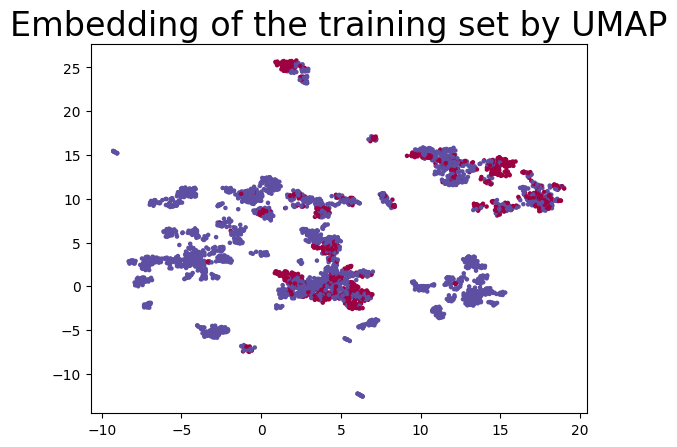

In [ ]:
trans = umap.UMAP(n_neighbors=25, n_components=3, min_dist=0.8, metric='cosine', random_state=42).fit(X_train)
plt.scatter(trans.embedding_[:, 0], trans.embedding_[:, 1], s= 5, c=y_train, cmap='Spectral')
plt.title('Embedding of the training set by UMAP', fontsize=24);

In [ ]:

# Directorio de salida para guardar los resultados y predicciones
output_folder = "/content/output_trans"
os.makedirs(output_folder, exist_ok=True)

algorithms = {
    "Random Forest (1200 trees)": RandomForestClassifier(n_estimators=1200, random_state=42),
    "Random Forest (500 trees)": RandomForestClassifier(n_estimators=500, random_state=42),
    "KNN (k=1)": KNeighborsClassifier(n_neighbors=1),
    "KNN (k=3)": KNeighborsClassifier(n_neighbors=3),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5),
    "SVM (RBF Kernel)": SVC(kernel='rbf', gamma='auto', C=1, random_state=42),
    #"SVM (Linear Kernel)": SVC(kernel='linear', gamma='auto', C=1, random_state=42),
    #"SVM (Polynomial Kernel)": SVC(kernel='poly', gamma='auto', C=1, random_state=42),
    #"MLP (1 Hidden Layer, 200 neurons)": MLPClassifier(hidden_layer_sizes=(200,), max_iter=1000, random_state=42),
    #"Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    #"Gaussian NB": GaussianNB()
}
results = {}
test_embedding = trans.transform(X_test)

for algo_name, algo in algorithms.items():
    # Train the model
    algo.fit(trans.embedding_, y_train)

    # Make predictions on the test set
    #y_pred = algo.predict(X_test)

    y_pred = algo.predict(test_embedding)
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # Store results
    results[algo_name] = {'accuracy': accuracy, 'f1_score': f1, 'precision': precision, 'recall': recall, 'ROC AUC':roc_auc, 'confusion_matrix': cm}

    # Realiza predicciones en df_test
    tests_embedding = trans.transform(df_filtrado_test)
    test_predictions = algo.predict(tests_embedding)

    # Guarda las predicciones en un archivo CSV
    test_predictions_labels = label_encoder.inverse_transform(test_predictions)
    test_predictions_df = pd.DataFrame({
        'genus': df_test.genus,
        'species': df_test.species,
        'accession': df_test.accession,
        'antibiotic': df_test.antibiotic,
        'status': test_predictions_labels
    })
    test_predictions_df.to_csv(os.path.join(output_folder, algo_name + "_test_predictions.csv"), index=False)

# Guarda los resultados generales en un CSV
results_df_test = pd.DataFrame.from_dict(results, orient='index')
results_df_test.to_csv(os.path.join(output_folder, "overall_results.csv"))

# Save overall results to CSV
#results_df_test = pd.DataFrame.from_dict(results, orient='index')
results_df_test

,accuracy,f1_score,precision,recall,ROC AUC,confusion_matrix
Random Forest (1200 trees),0.860364,0.857110,0.896216,0.927293,0.778318,"[[163, 96], [65, 829]]"
Random Forest (500 trees),0.861232,0.857652,0.895474,0.929530,0.777506,"[[162, 97], [63, 831]]"
KNN (k=1),0.838682,0.839963,0.901361,0.889262,0.776677,"[[172, 87], [99, 795]]"
KNN (k=3),0.853426,0.852497,0.901440,0.910515,0.783443,"[[170, 89], [80, 814]]"
KNN (k=5),0.874241,0.872700,0.911087,0.928412,0.807835,"[[178, 81], [64, 830]]"
SVM (RBF Kernel),0.873374,0.867380,0.892857,0.950783,0.778480,"[[157, 102], [44, 850]]"


# Sin funcion get_tfidf

In [ ]:
# Filtra el DataFrame por la columna 'phenotype'
df_training = df[df['phenotype'].isin(['Susceptible', 'Resistant'])]
df_test = df[df['phenotype'].isna()]

# Filtra el DataFrame original para seleccionar solo las columnas deseadas
df_filtrado = df_training.iloc[:,6:]
df_filtrado_test = df_test.iloc[:,6:]

labels = df_training['phenotype']
label_encoder = LabelEncoder()

# Fit and transform the labels
encoded_labels = label_encoder.fit_transform(labels)

# Dividir los datos codificados en conjunto de entrenamiento y conjunto de prueba
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(df_filtrado, encoded_labels, stratify=encoded_labels, test_size=test_size, random_state=42)


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


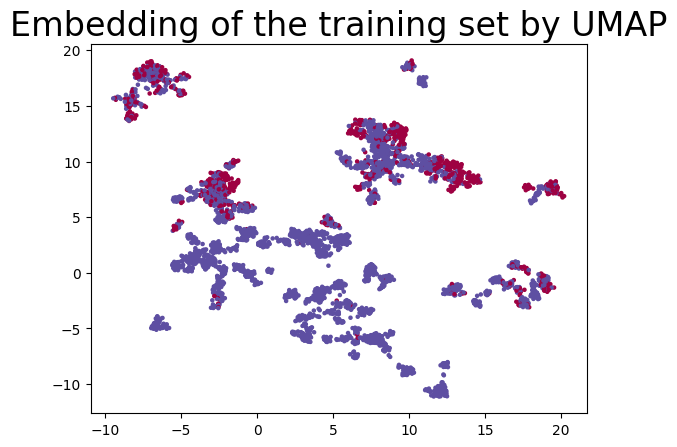

In [ ]:
trans = umap.UMAP(n_neighbors=25, n_components=10, min_dist=0.8, metric='cosine', random_state=42).fit(X_train)
plt.scatter(trans.embedding_[:, 0], trans.embedding_[:, 1], s= 5, c=y_train, cmap='Spectral')
plt.title('Embedding of the training set by UMAP', fontsize=24);

In [ ]:
# Directorio de salida para guardar los resultados y predicciones
output_folder = "/content/output_all"
os.makedirs(output_folder, exist_ok=True)

# Listas de parámetros para UMAP
n_neighbors_list = [5, 10, 20, 25, 50]
min_dists_list = [0.1, 0.2, 0.5, 0.8]

algorithms = {
    "Random Forest (1200 trees)": RandomForestClassifier(n_estimators=1200, random_state=42),
    "Random Forest (500 trees)": RandomForestClassifier(n_estimators=500, random_state=42),
    "KNN (k=1)": KNeighborsClassifier(n_neighbors=1),
    "KNN (k=3)": KNeighborsClassifier(n_neighbors=3),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5),
    "SVM (RBF Kernel)": SVC(kernel='rbf', gamma='auto', C=1, random_state=42),
}

results = {}

for n_neighbors in n_neighbors_list:
    for min_dist in min_dists_list:
        # Crear y ajustar el modelo UMAP
        trans = umap.UMAP(n_neighbors=n_neighbors, n_components=3, min_dist=min_dist, metric='cosine', random_state=42).fit(X_train)
        test_embedding = trans.transform(X_test)

        for algo_name, algo in algorithms.items():
            # Train the model
            algo.fit(trans.embedding_, y_train)

            # Make predictions on the test set
            y_pred = algo.predict(test_embedding)

            # Calculate evaluation metrics
            accuracy = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='weighted')
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            roc_auc = roc_auc_score(y_test, y_pred)
            cm = confusion_matrix(y_test, y_pred)

            # Guardar los resultados
            results[(algo_name, n_neighbors, min_dist)] = {
                'accuracy': accuracy,
                'f1_score': f1,
                'precision': precision,
                'recall': recall,
                'ROC AUC': roc_auc,
                'confusion_matrix': cm
            }

            # Realiza predicciones en df_test
            tests_embedding = trans.transform(df_filtrado_test)
            test_predictions = algo.predict(tests_embedding)

            # Guarda las predicciones en un archivo CSV
            test_predictions_labels = label_encoder.inverse_transform(test_predictions)
            test_predictions_df = pd.DataFrame({
                'genus': df_test.genus,
                'species': df_test.species,
                'accession': df_test.accession,
                'antibiotic': df_test.antibiotic,
                'status': test_predictions_labels
            })
            filename = f"{algo_name}_n_neighbors_{n_neighbors}_min_dist_{min_dist}_test_predictions.csv"
            test_predictions_df.to_csv(os.path.join(output_folder, filename), index=False)

# Guarda los resultados generales en un CSV
results_df = pd.DataFrame.from_dict(results, orient='index')
results_df.index = results_df.index.map(lambda x: f"{x[0]}_n_neighbors_{x[1]}_min_dist_{x[2]}")
results_df.to_csv(os.path.join(output_folder, "overall_results.csv"))


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridd

# Sin UMAP
Con todos los datos

In [ ]:
# Directorio de salida para guardar los resultados y predicciones
output_folder = "/content/output"
os.makedirs(output_folder, exist_ok=True)

trans = umap.UMAP(n_neighbors=10, n_components=3, min_dist=0.5, metric='cosine', random_state=42).fit(X_train)

algorithms = {
    "Random Forest (1200 trees)": RandomForestClassifier(n_estimators=1200, random_state=42),
    "Random Forest (500 trees)": RandomForestClassifier(n_estimators=500, random_state=42),
    "KNN (k=1)": KNeighborsClassifier(n_neighbors=1),
    "KNN (k=3)": KNeighborsClassifier(n_neighbors=3),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5),
    "SVM (RBF Kernel)": SVC(kernel='rbf', gamma='auto', C=1, random_state=42),

}
results = {}
test_embedding = trans.transform(X_test)

for algo_name, algo in algorithms.items():
    # Train the model
    algo.fit(trans.embedding_, y_train)

    # Make predictions on the test set
    #y_pred = algo.predict(X_test)

    y_pred = algo.predict(test_embedding)
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # Store results
    results[algo_name] = {'accuracy': accuracy, 'f1_score': f1, 'precision': precision, 'recall': recall, 'ROC AUC':roc_auc, 'confusion_matrix': cm}

    # Realiza predicciones en df_test
    tests_embedding = trans.transform(df_filtrado_test)
    test_predictions = algo.predict(tests_embedding)

    # Guarda las predicciones en un archivo CSV
    test_predictions_labels = label_encoder.inverse_transform(test_predictions)
    test_predictions_df = pd.DataFrame({
        'genus': df_test.genus,
        'species': df_test.species,
        'accession': df_test.accession,
        'antibiotic': df_test.antibiotic,
        'status': test_predictions_labels
    })
    test_predictions_df.to_csv(os.path.join(output_folder, algo_name + "_test_predictions.csv"), index=False)

# Guarda los resultados generales en un CSV
results_df_test = pd.DataFrame.from_dict(results, orient='index')
results_df_test.to_csv(os.path.join(output_folder, "overall_results.csv"))

# Save overall results to CSV
#results_df_test = pd.DataFrame.from_dict(results, orient='index')
results_df_test

,accuracy,f1_score,precision,recall,ROC AUC,confusion_matrix
Random Forest (1200 trees),0.860364,0.857110,0.896216,0.927293,0.778318,"[[163, 96], [65, 829]]"
Random Forest (500 trees),0.861232,0.857652,0.895474,0.929530,0.777506,"[[162, 97], [63, 831]]"
KNN (k=1),0.838682,0.839963,0.901361,0.889262,0.776677,"[[172, 87], [99, 795]]"
KNN (k=3),0.853426,0.852497,0.901440,0.910515,0.783443,"[[170, 89], [80, 814]]"
KNN (k=5),0.874241,0.872700,0.911087,0.928412,0.807835,"[[178, 81], [64, 830]]"
SVM (RBF Kernel),0.873374,0.867380,0.892857,0.950783,0.778480,"[[157, 102], [44, 850]]"


# Con PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
algorithms = {
    "Random Forest (1200 trees)": RandomForestClassifier(n_estimators=1200, random_state=42),
    "Random Forest (500 trees)": RandomForestClassifier(n_estimators=500, random_state=42),
    "KNN (k=1)": KNeighborsClassifier(n_neighbors=1),
    "KNN (k=3)": KNeighborsClassifier(n_neighbors=3),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5),
    "SVM (RBF Kernel)": SVC(kernel='rbf', gamma='auto', C=1, random_state=42),
    "SVM (Linear Kernel)": SVC(kernel='linear', gamma='auto', C=1, random_state=42),
    "SVM (Polynomial Kernel)": SVC(kernel='poly', gamma='auto', C=1, random_state=42),
    "MLP (1 Hidden Layer, 200 neurons)": MLPClassifier(hidden_layer_sizes=(200,), max_iter=1000, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Gaussian NB": GaussianNB()
}

results = {}

# Define the output folder
output_folder = "/content/pca_amr"
os.makedirs(output_folder, exist_ok=True)

df_numeric = df.iloc[:,6:]

# Escalar los datos antes de aplicar PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

# Aplicar PCA inicialmente para determinar el número de componentes
pca = PCA()
pca.fit(X_scaled)

# Calcula la varianza acumulada
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Encuentra el número de componentes que alcanzan el 90% de la varianza
n_components = np.where(cumulative_variance >= 0.95)[0][0] + 1

# Aplica PCA con el número óptimo de componentes
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Convertir a DataFrame
X_pca_df = pd.DataFrame(X_pca, index=df.index)

# Agrega las primeras 5 columnas de df a X_pca_df
df_pca = pd.concat([df.iloc[:, :5], X_pca_df], axis=1)

# Filtra el DataFrame por la columna 'phenotype'
df_training = df_pca[df_pca['phenotype'].isin(['Susceptible', 'Resistant'])]
df_test = df_pca[df_pca['phenotype'].isna()]

# Filtra el DataFrame original para seleccionar solo las columnas deseadas
df_filtrado = df_training.iloc[:,6:]
df_filtrado_test = df_test.iloc[:,6:]

labels = df_training['phenotype']
label_encoder = LabelEncoder()

# Fit and transform the labels
encoded_labels = label_encoder.fit_transform(labels)

# Dividir los datos codificados en conjunto de entrenamiento y conjunto de prueba
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(df_filtrado, encoded_labels, stratify=encoded_labels, test_size=test_size, random_state=42)

for algo_name, algo in algorithms.items():
    # Train the model
    algo.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = algo.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)

    # Store results
    results[algo_name] = {'accuracy': accuracy, 'f1_score': f1, 'confusion_matrix': cm}

    # Plot confusion matrix
    #plt.figure(figsize=(8, 6))
    #sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    #plt.xlabel('Predicción')
    #plt.ylabel('Etiqueta verdadera')
    #plt.xticks(ticks=[0.5, 1.5], labels=['Resistant', 'Susceptible'])
    #plt.yticks(ticks=[0.5, 1.5], labels=['Resistant', 'Susceptible'])
    #plt.title('Matriz de Confusión - ' + algo_name)

    # Save confusion matrix plot
    #plt.savefig(os.path.join(output_folder, algo_name + "_confusion_matrix.png"))
    #plt.close()

    # Make predictions on df_test
    test_predictions = algo.predict(df_filtrado_test)

    # Save the predictions to a CSV file
    test_predictions_labels = label_encoder.inverse_transform(test_predictions)
    test_predictions_df = pd.DataFrame({
        'genus':df_test.genus,
        'species':df_test.species,
        'accession': df_test.accession,
        'antibiotic': df_test.antibiotic,
        'status': test_predictions_labels
    })
    test_predictions_df.to_csv(os.path.join(output_folder, algo_name + "_test_predictions.csv"), index=False)

# Save overall results to CSV
results_df = pd.DataFrame.from_dict(results, orient='index')
results_df.to_csv(os.path.join(output_folder, "overall_results.csv"))

results_df

,accuracy,f1_score,confusion_matrix
Random Forest (1200 trees),0.894189,0.885352,"[[152, 107], [15, 879]]"
Random Forest (500 trees),0.895056,0.887137,"[[156, 103], [18, 876]]"
KNN (k=1),0.888118,0.886404,"[[184, 75], [54, 840]]"
KNN (k=3),0.890720,0.887153,"[[175, 84], [42, 852]]"
KNN (k=5),0.883781,0.878722,"[[165, 94], [40, 854]]"
SVM (RBF Kernel),0.902862,0.895641,"[[161, 98], [14, 880]]"
SVM (Linear Kernel),0.869905,0.871587,"[[194, 65], [85, 809]]"
SVM (Polynomial Kernel),0.914137,0.912136,"[[194, 65], [34, 860]]"
"MLP (1 Hidden Layer, 200 neurons)",0.915872,0.915579,"[[208, 51], [46, 848]]"
Logistic Regression,0.895056,0.895823,"[[204, 55], [66, 828]]"


In [ ]:
df_pca

,accession,genus,species,phenotype,antibiotic,0,1,2,3,4,...,1166,1167,1168,1169,1170,1171,1172,1173,1174,1175
0,GCA_002947415,Acinetobacter,baumannii,Resistant,meropenem,-19.080384,21.114099,-15.983926,-13.602845,10.732178,...,-0.347012,0.507925,1.008601,0.222658,-0.123082,-0.077129,0.260505,0.715109,0.326467,-1.894702
1,GCA_002947845,Acinetobacter,baumannii,Resistant,meropenem,-18.979705,19.558309,-16.424971,-13.489796,8.313948,...,-1.673075,-0.197661,1.276027,-0.417307,1.087279,-1.051429,-0.238789,0.433356,1.532962,-0.580870
2,GCA_002948925,Acinetobacter,baumannii,Resistant,meropenem,-21.160753,19.433811,-19.908663,-13.361394,8.982314,...,0.450521,-1.596516,0.654692,-0.038099,-2.002818,-0.080488,-0.230825,0.377275,-1.009474,0.815527
3,GCA_002996805,Acinetobacter,baumannii,Resistant,meropenem,-20.484498,20.063277,-16.999132,-13.348571,10.463711,...,0.022177,1.606691,-1.662804,-0.057062,-0.272125,-0.585283,0.839435,1.379278,-0.314994,1.126978
4,GCA_003006035,Acinetobacter,baumannii,Resistant,meropenem,-21.371672,22.471555,-16.378733,-11.092568,8.558561,...,0.153657,-0.556835,0.452148,0.798793,0.102284,0.664146,0.098103,-0.416995,0.236643,-0.045170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7576,SRR3242343,Salmonella,enterica,NaN,ciprofloxacin,-3.273466,-13.350252,4.804158,-8.219350,3.285680,...,-0.132777,0.073663,-0.364206,-0.085649,-0.105822,0.042042,0.094678,0.056165,0.120440,0.096737
7577,SRR2082856,Salmonella,enterica,NaN,ciprofloxacin,-8.956836,-22.850216,10.553535,1.127376,-5.336632,...,-0.377972,0.006822,0.386200,0.245217,-0.293741,-0.167316,-0.006628,-0.299016,0.276642,0.494503
7578,SRR3242362,Salmonella,enterica,NaN,ciprofloxacin,-7.552856,-27.292884,15.792695,5.005748,-7.751263,...,-0.391049,-0.318027,-0.316776,0.175103,0.607004,0.485052,0.103631,0.510528,0.121885,-0.309958
7579,SRR1257300,Salmonella,enterica,NaN,ciprofloxacin,-7.291342,-24.350034,15.329717,2.634328,-5.088498,...,0.473906,-0.353689,-0.022337,0.201685,0.074407,0.153632,0.273386,0.064159,0.017726,-0.116588


# SVD

In [ ]:
n_comp = 150 #cuántos componentes?
svd_fact = get_factorization(data=tfidf, n_comp=n_comp, nmf=False)
amr_lsa = svd_fact.transform(tfidf)
amr_lsa.shape

# NMF

In [ ]:
nmf_fact = get_factorization(data=tfidf, n_comp=n_comp, nmf=True)
amr_nmf = nmf_fact.transform(tfidf)


# Descargar modelos

In [ ]:
# guardar modelo
from camda_functions import save_pickle_model
#f_path = os.path.join(ruta_actual, carpeta_data)
f_path = ruta_actual
pkl_file = 'nmf.pkl'
save_pickle_model(nmf_fact, f_path, pkl_file)
pkl_file = 'svd.pkl'
save_pickle_model(svd_fact, f_path, pkl_file)

# Descargar resultados

In [ ]:
# Comprimir la carpeta de resultados
!zip -r /content/output_code2.zip /content/output_code2

# Importar la biblioteca necesaria y descargar el archivo ZIP
#from google.colab import files
files.download('/content/output_code2.zip')


  adding: content/output_code2/ (stored 0%)
  adding: content/output_code2/KNN (k=1)_test_predictions.csv (deflated 92%)
  adding: content/output_code2/SVM (RBF Kernel)_test_predictions.csv (deflated 92%)
  adding: content/output_code2/Random Forest (1200 trees)_test_predictions.csv (deflated 92%)
  adding: content/output_code2/KNN (k=3)_confusion_matrix.png (deflated 18%)
  adding: content/output_code2/KNN (k=5)_confusion_matrix.png (deflated 18%)
  adding: content/output_code2/KNN (k=5)_test_predictions.csv (deflated 92%)
  adding: content/output_code2/SVM (RBF Kernel)_confusion_matrix.png (deflated 18%)
  adding: content/output_code2/Random Forest (500 trees)_confusion_matrix.png (deflated 17%)
  adding: content/output_code2/KNN (k=1)_confusion_matrix.png (deflated 17%)
  adding: content/output_code2/overall_results.csv (deflated 90%)
  adding: content/output_code2/Random Forest (500 trees)_test_predictions.csv (deflated 92%)
  adding: content/output_code2/KNN (k=3)_test_predictions

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>